In [ ]:
import pandas as pd

students_data = pd.read_csv('/content/StudentsPerformance.csv')
scores_data = students_data[['math score', 'reading score', 'writing score']]


In [ ]:
students_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
scores_data.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(scores_data)


In [ ]:
scaled_data

array([[ 0.39002351,  0.19399858,  0.39149181],
       [ 0.19207553,  1.42747598,  1.31326868],
       [ 1.57771141,  1.77010859,  1.64247471],
       ...,
       [-0.46775108,  0.12547206, -0.20107904],
       [ 0.12609287,  0.60515772,  0.58901542],
       [ 0.71993682,  1.15336989,  1.18158627]])

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Método del codo
sse = {}

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(scaled_data)
    sse[k] = kmeans.inertia_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

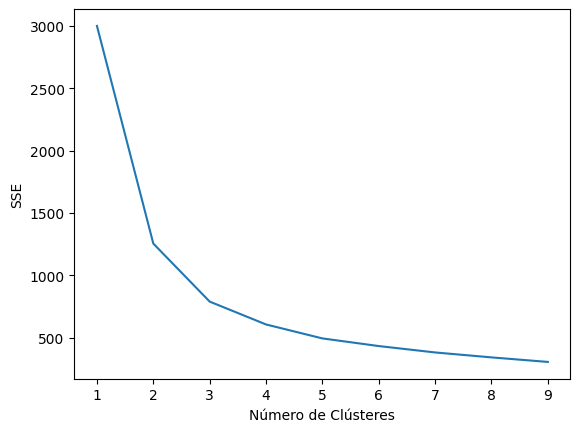

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

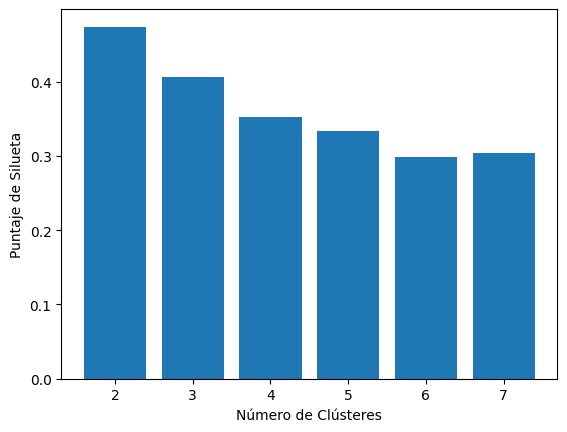

In [ ]:

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Número de Clústeres")
plt.ylabel("SSE")
plt.show()

# Puntajes de Silueta
silhouette_scores = []
for n_cluster in range(2, 8):
    silhouette_scores.append(
        silhouette_score(scaled_data, KMeans(n_clusters = n_cluster).fit_predict(scaled_data)))

plt.bar(range(2, 8), silhouette_scores)
plt.xlabel('Número de Clústeres')
plt.ylabel('Puntaje de Silueta')
plt.show()


In [ ]:
# Aplicar K-means con el número óptimo de clústeres
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_data)

scaled_df = pd.DataFrame(scaled_data, columns=['math score', 'reading score', 'writing score'])
scaled_df['Cluster'] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


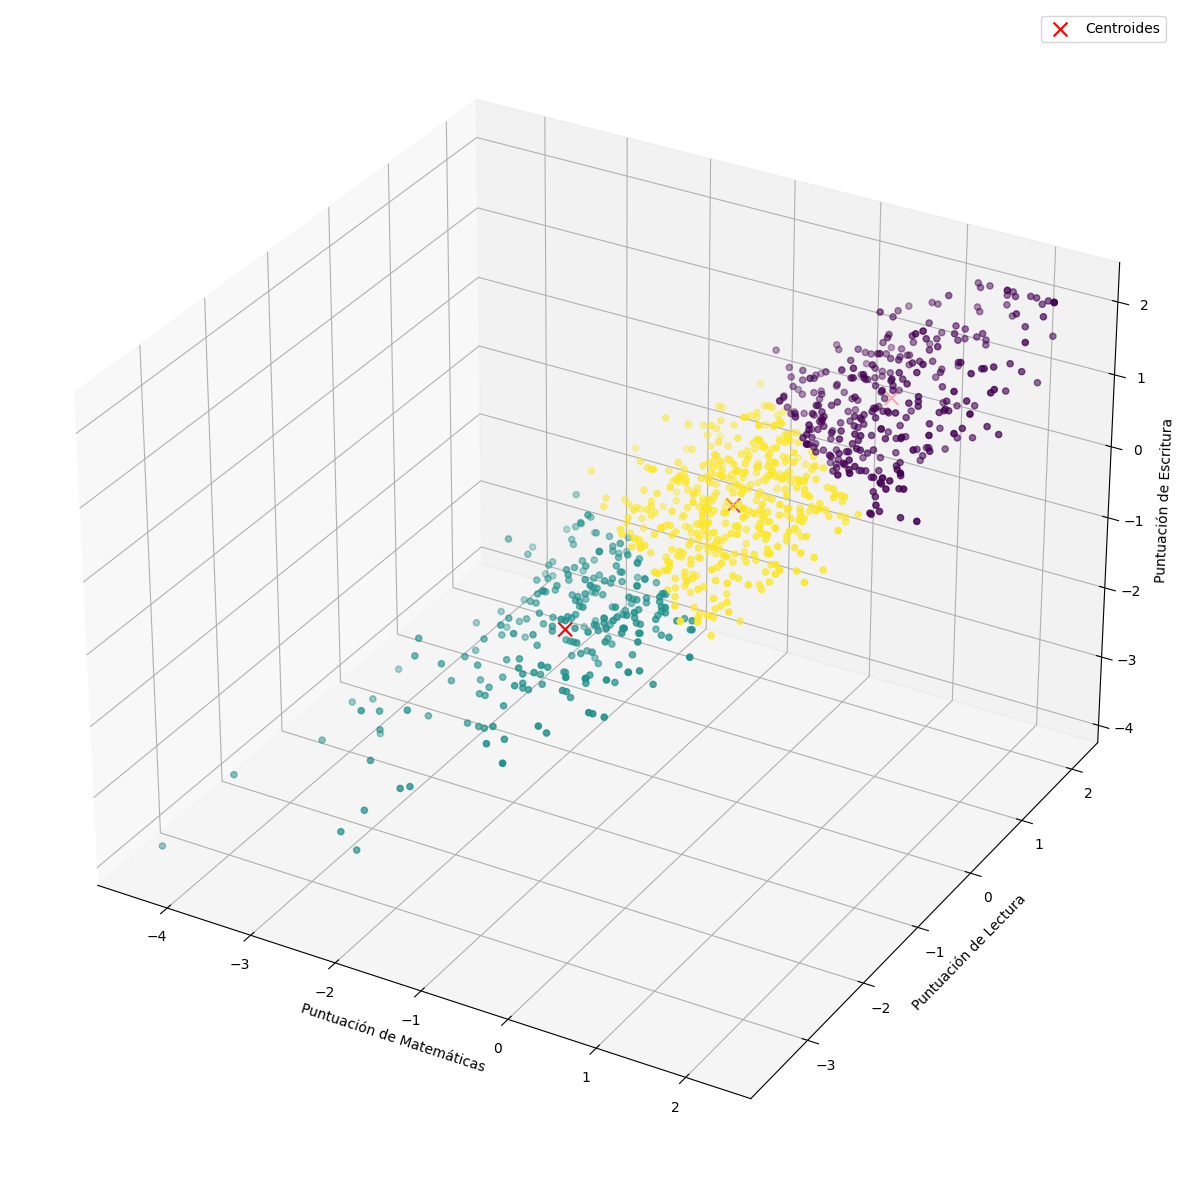

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

centroids = kmeans.cluster_centers_

# Gráfico 3D
fig = plt.figure(figsize=(15, 17))
ax = fig.add_subplot(111, projection='3d')

# Plotting los datos
ax.scatter(scaled_df['math score'], scaled_df['reading score'], scaled_df['writing score'],
           c=scaled_df['Cluster'], marker='o', cmap='viridis')

# Plotting los centroides
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='x', s=100, label='Centroides')

ax.set_xlabel('Puntuación de Matemáticas')
ax.set_ylabel('Puntuación de Lectura')
ax.set_zlabel('Puntuación de Escritura')
ax.legend()

plt.show()


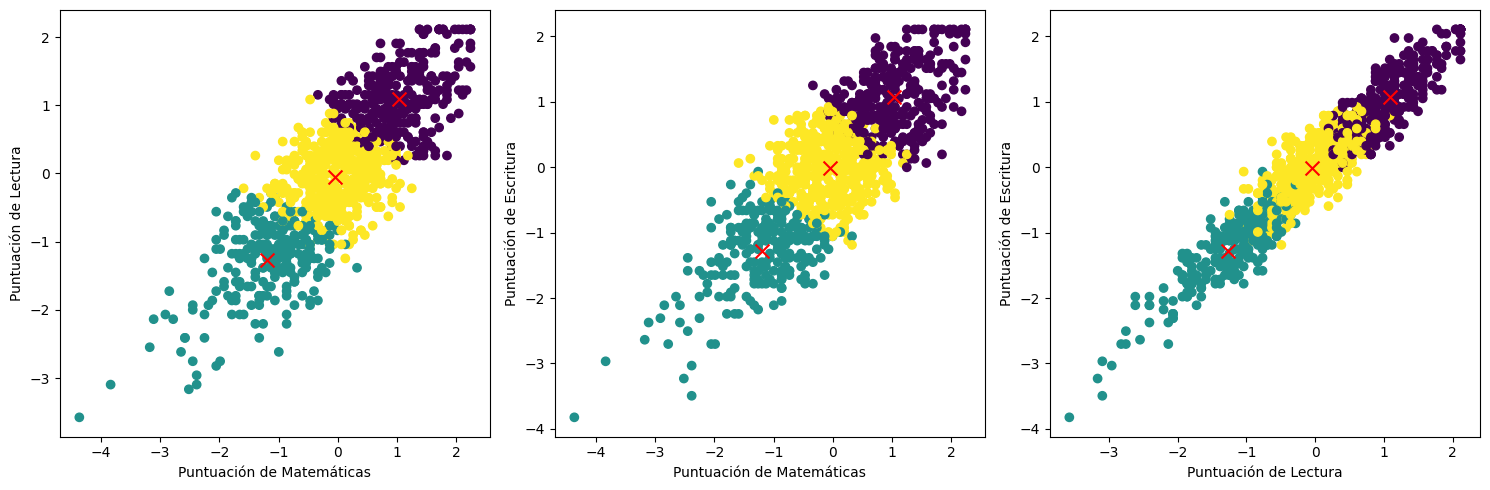

In [ ]:
# Gráficos 2D
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Math vs Reading
axes[0].scatter(scaled_df['math score'], scaled_df['reading score'], c=scaled_df['Cluster'], cmap='viridis')
axes[0].scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100)
axes[0].set_xlabel('Puntuación de Matemáticas')
axes[0].set_ylabel('Puntuación de Lectura')

# Math vs Writing
axes[1].scatter(scaled_df['math score'], scaled_df['writing score'], c=scaled_df['Cluster'], cmap='viridis')
axes[1].scatter(centroids[:, 0], centroids[:, 2], c='red', marker='x', s=100)
axes[1].set_xlabel('Puntuación de Matemáticas')
axes[1].set_ylabel('Puntuación de Escritura')

# Reading vs Writing
axes[2].scatter(scaled_df['reading score'], scaled_df['writing score'], c=scaled_df['Cluster'], cmap='viridis')
axes[2].scatter(centroids[:, 1], centroids[:, 2], c='red', marker='x', s=100)
axes[2].set_xlabel('Puntuación de Lectura')
axes[2].set_ylabel('Puntuación de Escritura')

plt.tight_layout()
plt.show()


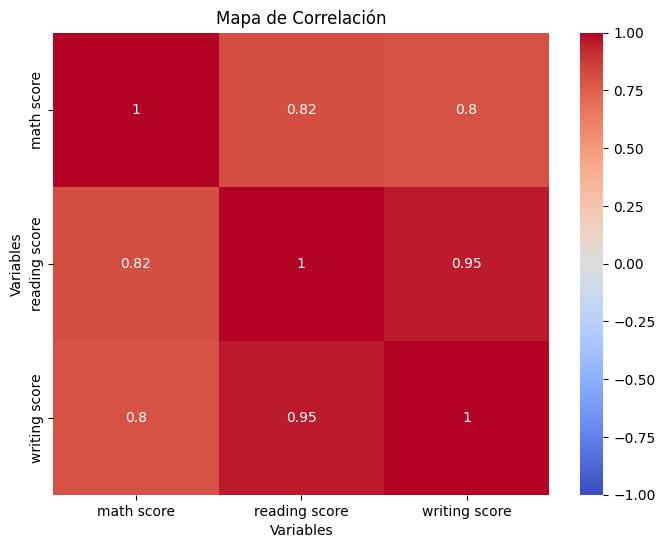

In [ ]:
import seaborn as sns


# Crear una figura de tamaño adecuado
plt.figure(figsize=(8, 6))

# Calcular la matriz de correlación
correlation_matrix = scores_data.corr()

# Crear el heatmap de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Agregar títulos y etiquetas a los ejes
plt.title('Mapa de Correlación')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Mostrar el heatmap
plt.show()
